# Parallel scaling in Numbat: 3D example #

Comparing the solve time for various numbers of processors for the 3D example problem (3Dddc.i).

Chris Green, 2016 (chris.green@csiro.au)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Speedup ##
The times are taken from the output files for each run (in the ./results directory). Note that we are comparing the *Active time* specified in the output file.

In [8]:
npdata = np.array([1, 5, 10, 20, 60, 100])
tdataraw = np.array([100068, 23346.6, 12388.8, 6666.51, 2603.45, 1807.37])
tdata = tdataraw[0] / tdataraw
tideal = npdata / npdata[0].astype(float)

The simulation times are

In [13]:
for i in range(0,6) :
    print npdata[i], " processors: ", tdataraw[i]/3600., " hours, (", tdataraw[i]/60., " minutes)" 

1  processors:  27.7966666667  hours, ( 1667.8  minutes)
5  processors:  6.48516666667  hours, ( 389.11  minutes)
10  processors:  3.44133333333  hours, ( 206.48  minutes)
20  processors:  1.85180833333  hours, ( 111.1085  minutes)
60  processors:  0.723180555556  hours, ( 43.3908333333  minutes)
100  processors:  0.502047222222  hours, ( 30.1228333333  minutes)


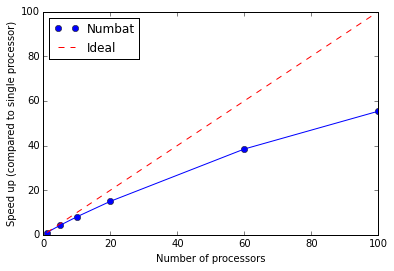

In [14]:
plt.plot(npdata, tdata,'ob', label='Numbat')
plt.plot(npdata, tdata, 'b')
plt.plot(npdata, tideal, 'r--', label='Ideal')
plt.xlabel('Number of processors')
plt.ylabel('Speed up (compared to single processor)')
plt.legend(loc='best')

## Flux ##
Comparison of the flux over the top boundary for each of the runs. Initally, the flux is purely diffusive, in which case the flux over the top boundary scales as $\sqrt(1/(\pi t))$ where $t$ is time.

In [15]:
difftdata = np.linspace(1,2500, 100)
diffcdata = np.sqrt(1/(np.pi * difftdata))

Read in the flux from each run, and plot them for comparison.

In [16]:
area = 500 * 500;
np1data = pd.read_csv('./results/np1.csv', header = 0, skiprows=[1])
np5data = pd.read_csv('./results/np5.csv', header = 0, skiprows=[1])
np10data = pd.read_csv('./results/np10.csv', header = 0, skiprows=[1])
np20data = pd.read_csv('./results/np20.csv', header = 0, skiprows=[1])
np60data = pd.read_csv('./results/np60.csv', header = 0, skiprows=[1])
np100data = pd.read_csv('./results/np100.csv', header = 0, skiprows=[1])

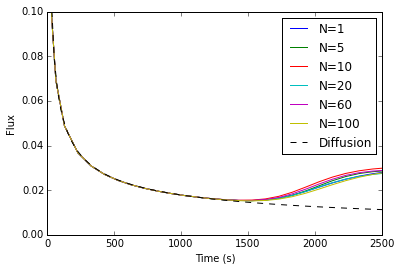

In [17]:
plt.plot(np1data.time, -np1data.boundaryfluxint / area, label = 'N=1')
plt.plot(np5data.time, -np5data.boundaryfluxint / area, label = 'N=5')
plt.plot(np10data.time, -np10data.boundaryfluxint / area, label = 'N=10')
plt.plot(np20data.time, -np20data.boundaryfluxint / area, label = 'N=20')
plt.plot(np60data.time, -np60data.boundaryfluxint / area, label = 'N=60')
plt.plot(np100data.time, -np100data.boundaryfluxint / area, label = 'N=100')
plt.plot(difftdata, diffcdata, '--',label = 'Diffusion')
plt.xlabel('Time (s)')
plt.ylabel('Flux')
plt.legend(loc = 'best')
plt.ylim([0,0.1]);